In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import plotly.express as px

In [73]:
## quick hack

from datetime import date, timedelta

today = date.today()
yesterday = today - timedelta(days=2)

d1 = yesterday.strftime("%m-%d-%Y")
print("Yesterdays Date =", d1)
file_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + d1 + '.csv'
df = pd.read_csv(file_url)
df[df['Province_State']=='New York']

Yesterdays Date = 05-20-2020


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
26,36001.0,Albany,New York,US,2020-05-21 02:32:48,42.600603,-73.977239,1682,69,0,1613,"Albany, New York, US"
38,36003.0,Allegany,New York,US,2020-05-21 02:32:48,42.257484,-78.027505,44,0,0,44,"Allegany, New York, US"
261,36007.0,Broome,New York,US,2020-05-21 02:32:48,42.159032,-75.813261,436,30,0,406,"Broome, New York, US"
406,36009.0,Cattaraugus,New York,US,2020-05-21 02:32:48,42.247782,-78.679231,70,0,0,70,"Cattaraugus, New York, US"
407,36011.0,Cayuga,New York,US,2020-05-21 02:32:48,42.912617,-76.557316,68,1,0,67,"Cayuga, New York, US"
436,36013.0,Chautauqua,New York,US,2020-05-21 02:32:48,42.227692,-79.366918,50,4,0,46,"Chautauqua, New York, US"
441,36015.0,Chemung,New York,US,2020-05-21 02:32:48,42.138911,-76.763880,134,1,0,133,"Chemung, New York, US"
442,36017.0,Chenango,New York,US,2020-05-21 02:32:48,42.494300,-75.608876,118,0,0,118,"Chenango, New York, US"
544,36019.0,Clinton,New York,US,2020-05-21 02:32:48,44.745309,-73.678754,94,4,0,90,"Clinton, New York, US"
577,36021.0,Columbia,New York,US,2020-05-21 02:32:48,42.248193,-73.630891,350,28,0,322,"Columbia, New York, US"


In [54]:
data = df[['Confirmed','Lat','Long_','Country_Region','Recovered','Deaths']]
data.rename( columns={'Lat':'lat','Long_':'lon'},inplace = True)
data = data.dropna()
fig = px.scatter_mapbox(data,lat="lat", lon="lon", hover_name="Country_Region", hover_data=["Confirmed",'Recovered','Deaths'],
                        color_discrete_sequence=["firebrick"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

C:\Users\sahib pratap\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df.drop(columns=['FIPS','Admin2','Province_State','Last_Update','Lat','Long_','Combined_Key'],inplace=True)
all_cases=df.groupby('Country_Region').sum()

In [56]:
all_cases

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,8145,187,930,7028
Albania,964,31,758,175
Algeria,7542,568,3968,3006
Andorra,762,51,639,72
Angola,52,3,17,32
...,...,...,...,...
West Bank and Gaza,398,2,346,50
Western Sahara,6,0,6,0
Yemen,184,30,5,149


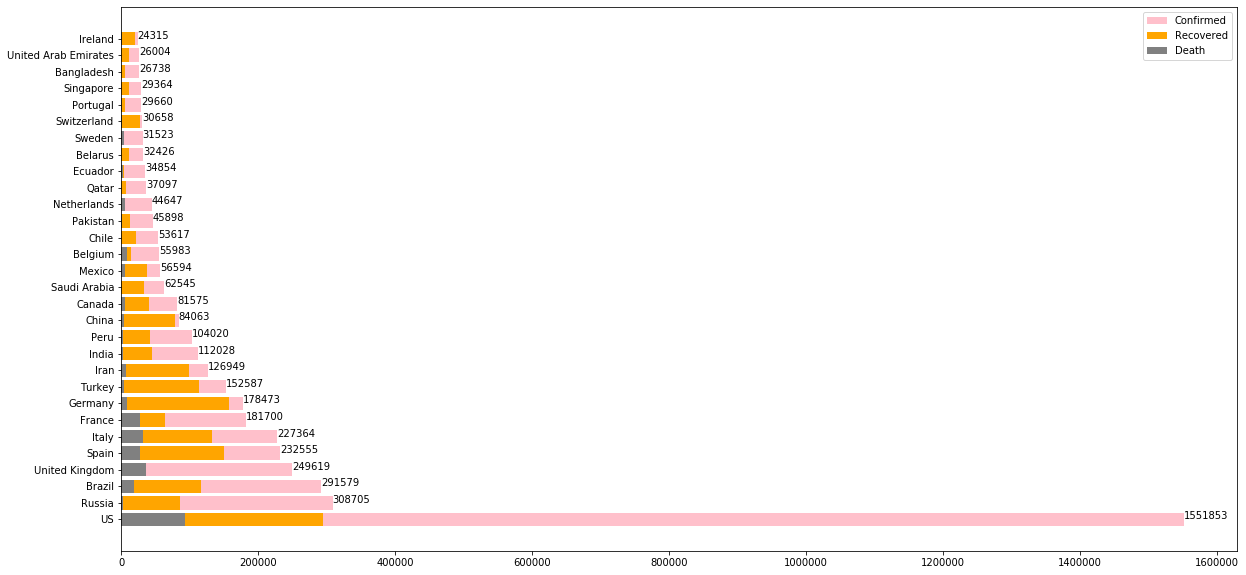

In [57]:
##calculating mortality rate
all_cases['Mortality Rate (per 100)'] = np.round(100*all_cases['Deaths']/all_cases['Confirmed'],2)
data = all_cases.nlargest(30,'Confirmed')
x = data.index
plt.figure(figsize = (20,10))
plt.barh(x,data['Confirmed'],color = 'pink',label='Confirmed')
for index, value in enumerate(data['Confirmed']):
    plt.text(value, index, str(value))
plt.barh(x,data['Recovered'],color = 'orange',label='Recovered')
plt.barh(x,data['Deaths'],color = 'grey',label='Death')
plt.legend()

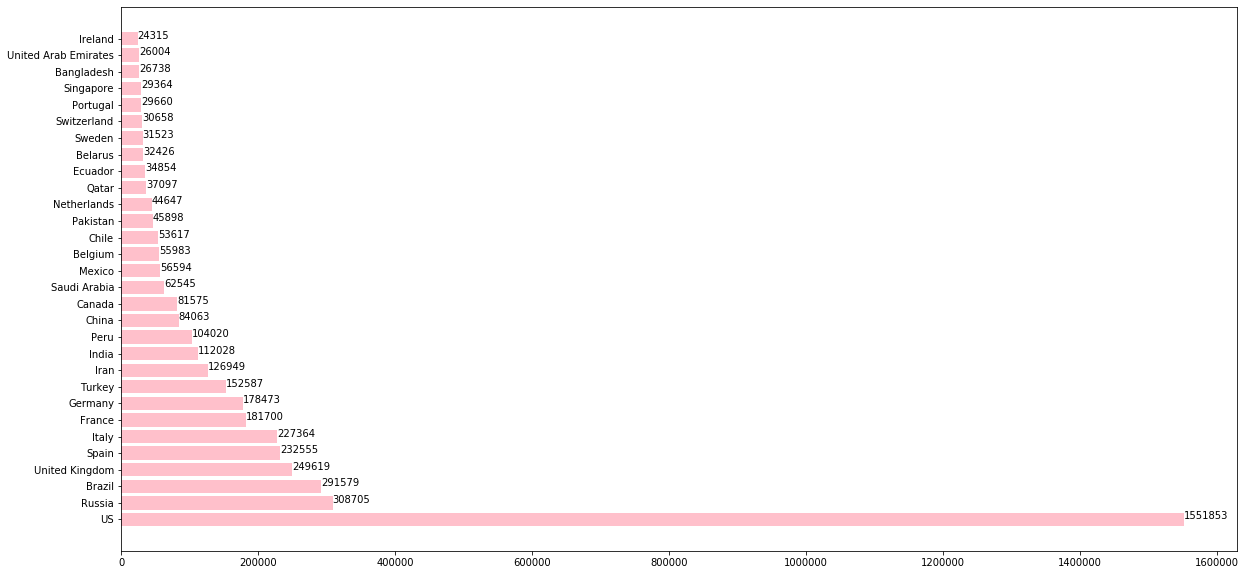

In [58]:
plt.figure(figsize = (20,10))
plt.barh(x,data['Confirmed'],color = 'pink',label='Confirmed')
for index, value in enumerate(data['Confirmed']):
    plt.text(value, index, str(value))

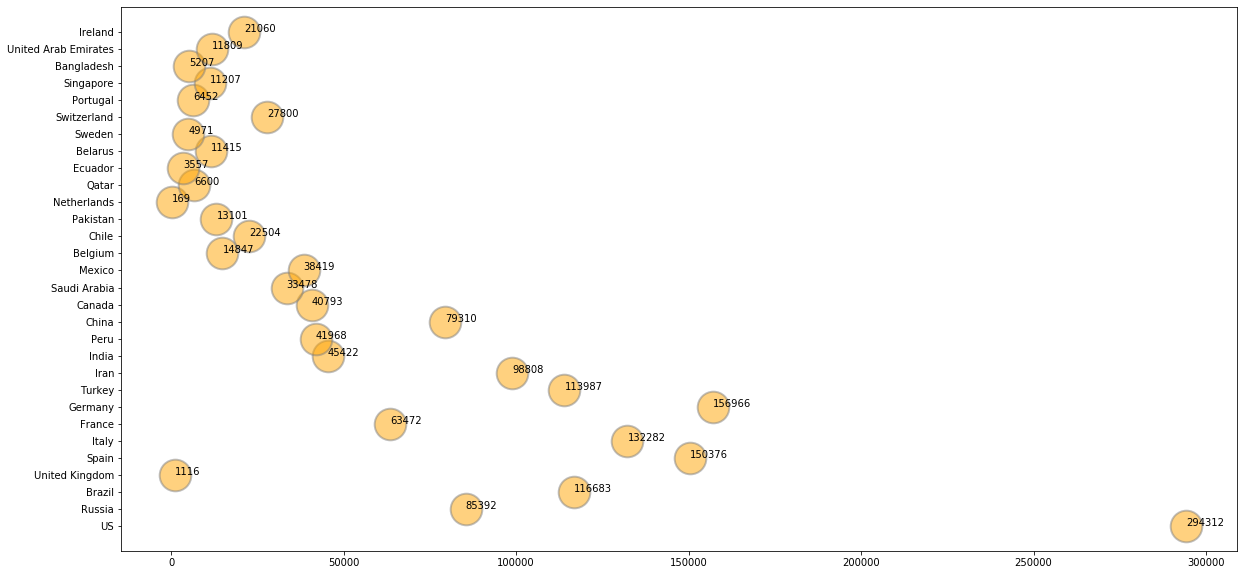

In [59]:
plt.figure(figsize = (20,10))
plt.scatter(data['Recovered'],x,alpha=0.5,s = 1000,cmap="BuPu",color = 'orange',label='Recovered',edgecolors="grey", linewidth=2)
for index, value in enumerate(data['Recovered']):
    plt.text(value, index, str(value))

In [60]:
data.style.set_properties(**{'background-color': 'brown',
                            'color': 'gold',
                            'border-color': 'white'})

,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
Country_Region,,,,,
US,1551853,93439,294312,1162407,6.020000
Russia,308705,2972,85392,220341,0.960000
Brazil,291579,18859,116683,156037,6.470000
United Kingdom,249619,35786,1116,212717,14.340000
Spain,232555,27888,150376,54291,11.990000
Italy,227364,32330,132282,62752,14.220000
France,181700,28135,63472,90093,15.480000
Germany,178473,8144,156966,13363,4.560000
Turkey,152587,4222,113987,34378,2.770000


In [61]:
##total confirmed cases in world
total_confirmed = all_cases['Confirmed'].sum()
print('total confirmed cases in world',total_confirmed)

##top 10 countries having maximum case of virus
all_cases['Confirmed'].nlargest(20)


total confirmed cases in world 4996472


Country_Region
US                1551853
Russia             308705
Brazil             291579
United Kingdom     249619
Spain              232555
Italy              227364
France             181700
Germany            178473
Turkey             152587
Iran               126949
India              112028
Peru               104020
China               84063
Canada              81575
Saudi Arabia        62545
Mexico              56594
Belgium             55983
Chile               53617
Pakistan            45898
Netherlands         44647
Name: Confirmed, dtype: int64

In [62]:
##total death cases in world
total_death = all_cases['Deaths'].sum()
print('total deaths in world',total_death)
all_cases.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'})
##top 10 countries having maximum deaths due to virus
all_cases['Deaths'].nlargest(20)

total deaths in world 328115


Country_Region
US                93439
United Kingdom    35786
Italy             32330
France            28135
Spain             27888
Brazil            18859
Belgium            9150
Germany            8144
Iran               7183
Canada             6150
Mexico             6090
Netherlands        5767
China              4638
Turkey             4222
Sweden             3831
India              3434
Peru               3024
Russia             2972
Ecuador            2888
Switzerland        1892
Name: Deaths, dtype: int64

In [63]:
##total recovered cases in world
total_recovered = all_cases['Recovered'].sum()
print('total deaths in world',total_recovered)

##top 10 countries having maximum active cases of virus
all_cases['Recovered'].nlargest(10)

total deaths in world 1897466


Country_Region
US         294312
Germany    156966
Spain      150376
Italy      132282
Brazil     116683
Turkey     113987
Iran        98808
Russia      85392
China       79310
France      63472
Name: Recovered, dtype: int64

In [64]:
##total active cases in world
total_active = all_cases['Active'].sum()
print('total deaths in world',total_active)

##top 10 countries having maximum active cases of virus
all_cases['Active'].nlargest(10)

total deaths in world 2769196


Country_Region
US                1162407
Russia             220341
United Kingdom     212717
Brazil             156037
France              90093
India               63172
Italy               62752
Peru                59028
Spain               54291
Netherlands         38711
Name: Active, dtype: int64

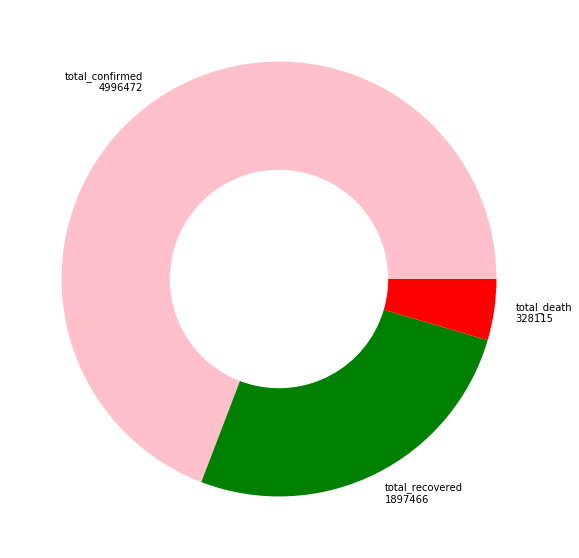

In [65]:
x = [total_confirmed,total_recovered,total_death]
plt.figure(figsize=(20,10))
labels = ['total_confirmed\n'+str(total_confirmed),'total_recovered\n'+str(total_recovered),'total_death\n'+str(total_death)]
color = ['pink','green','red']
explode = [0,0,0]
plt.pie(x,labels = labels,colors = color,explode = explode)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
#Add an Artist to the axes, and return the artist.
fig.gca().add_artist(central_circle)

In [66]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [67]:
df_confirmed.drop(columns=['Lat','Long'],inplace=True)
df_recovered.drop(columns=['Lat','Long'],inplace=True)
df_deaths.drop(columns=['Lat','Long'],inplace=True)

In [68]:
# consolidate the data as per the country

df_confirmed_con = df_confirmed.groupby(by='Country/Region').sum()
df_recovered_con = df_recovered.groupby(by='Country/Region').sum()
df_death_con = df_deaths.groupby(by='Country/Region').sum()

In [24]:
df_confirmed_con = df_confirmed_con.transpose()
df_recovered_con = df_recovered_con.transpose()
df_death_con = df_death_con.transpose()

In [25]:
# melt data and merge confirmed, death and recovered time series into one dataframe

# add date column to the data frame
df_confirmed_con['date'] = df_confirmed_con.index
df_death_con['date'] = df_death_con.index
df_recovered_con['date'] = df_recovered_con.index

# convert the data into long form in order to merge the data
df_confirmed_long = df_confirmed_con.melt(id_vars=['date'],value_name='Confirmed')
df_death_long = df_death_con.melt(id_vars=['date'],value_name='Death')
df_recovered_long = df_recovered_con.melt(id_vars=['date'],value_name='Recovered') 
# merge the data
full_table = df_confirmed_long.merge(right=df_death_long, how='left',
                                     on=['Country/Region', 'date'])

full_table = full_table.merge(right=df_recovered_long, how='left',
                                     on=['Country/Region', 'date'])
full_table

,date,Country/Region,Confirmed,Death,Recovered
0,1/22/20,Afghanistan,0,0,0
1,1/23/20,Afghanistan,0,0,0
2,1/24/20,Afghanistan,0,0,0
3,1/25/20,Afghanistan,0,0,0
4,1/26/20,Afghanistan,0,0,0
...,...,...,...,...,...
22743,5/17/20,Zimbabwe,44,4,17
22744,5/18/20,Zimbabwe,46,4,18
22745,5/19/20,Zimbabwe,46,4,18
22746,5/20/20,Zimbabwe,48,4,18


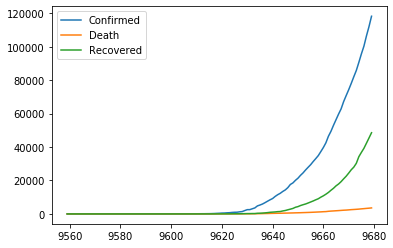

In [26]:
full_table[full_table['Country/Region']=='India'].plot()

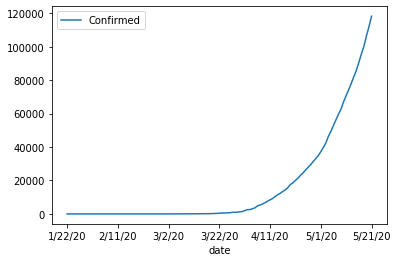

In [27]:
full_table[full_table['Country/Region']=='India'].plot('date','Confirmed')

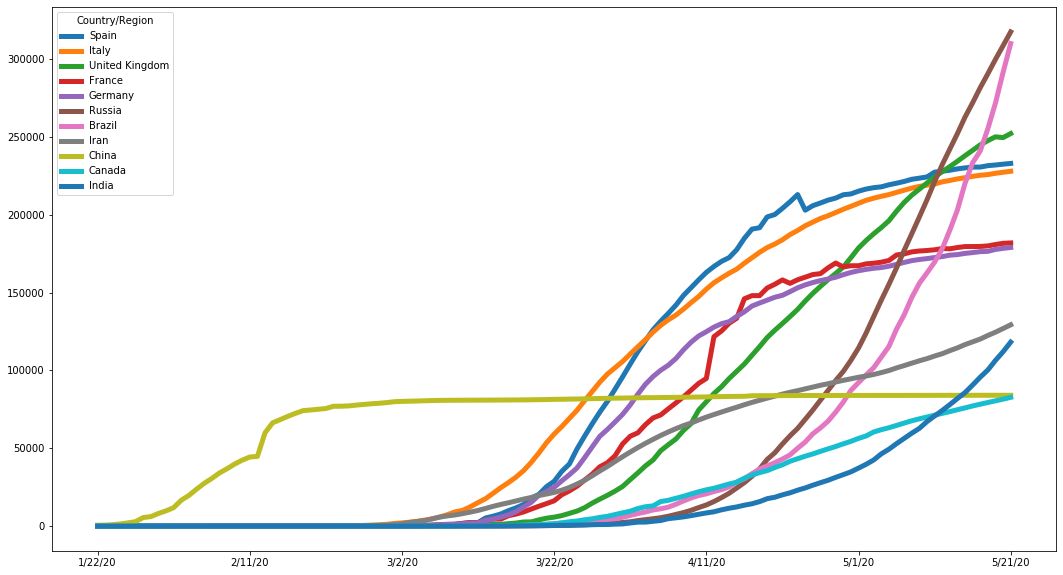

In [28]:
df_confirmed_con[['Spain','Italy','United Kingdom','France','Germany','Russia','Brazil','Iran','China','Canada','India']].plot(figsize=(18,10),linewidth=5)

# Per day Confirmed cases

Text(0.5, 0, 'DATE')

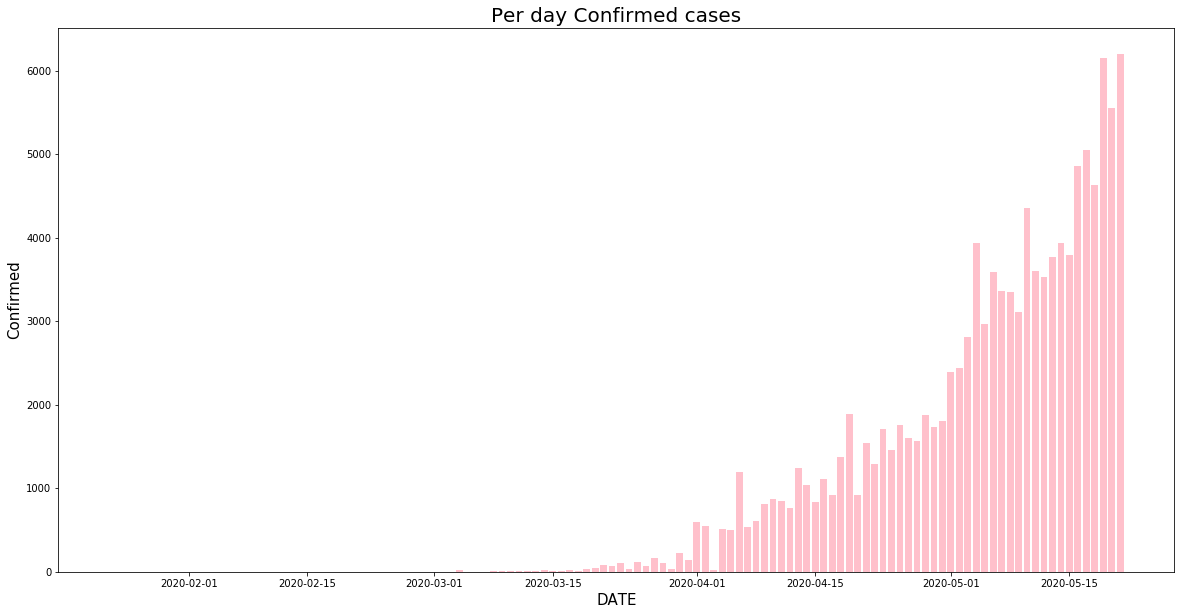

In [29]:
country = 'India'
plt.figure(figsize=(20,10))
t = df_confirmed_con[country] - df_confirmed_con[country].shift(1)
df_confirmed_con['date']=pd.to_datetime(df_confirmed_con['date'])
plt.bar(df_confirmed_con['date'],t,color='pink')
plt.title('Per day Confirmed cases',fontsize=20)
plt.ylabel('Confirmed',fontsize=15)
plt.xlabel('DATE',fontsize=15)

# Per day recovered cases

Text(0.5, 0, 'DATE')

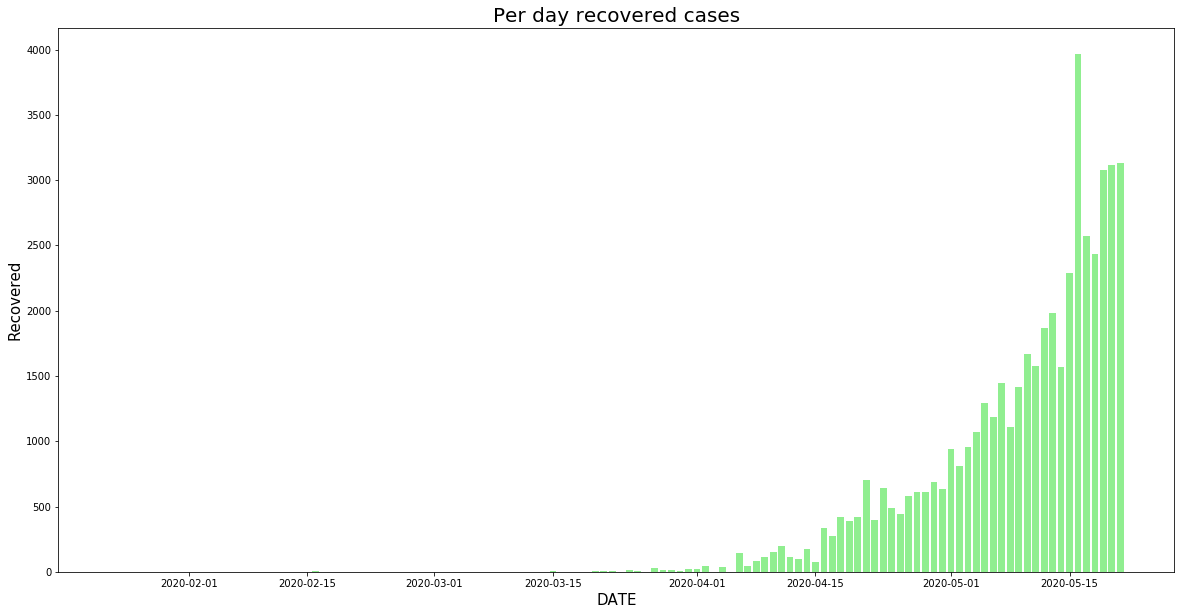

In [30]:
country = 'India'
plt.figure(figsize=(20,10))
t = df_recovered_con[country] - df_recovered_con[country].shift(1)
df_recovered_con['date']=pd.to_datetime(df_recovered_con['date'])
plt.bar(df_recovered_con['date'],t,color='lightgreen')
plt.title('Per day recovered cases',fontsize=20)
plt.ylabel('Recovered',fontsize=15)
plt.xlabel('DATE',fontsize=15)

# Per day Death cases

Text(0.5, 0, 'DATE')

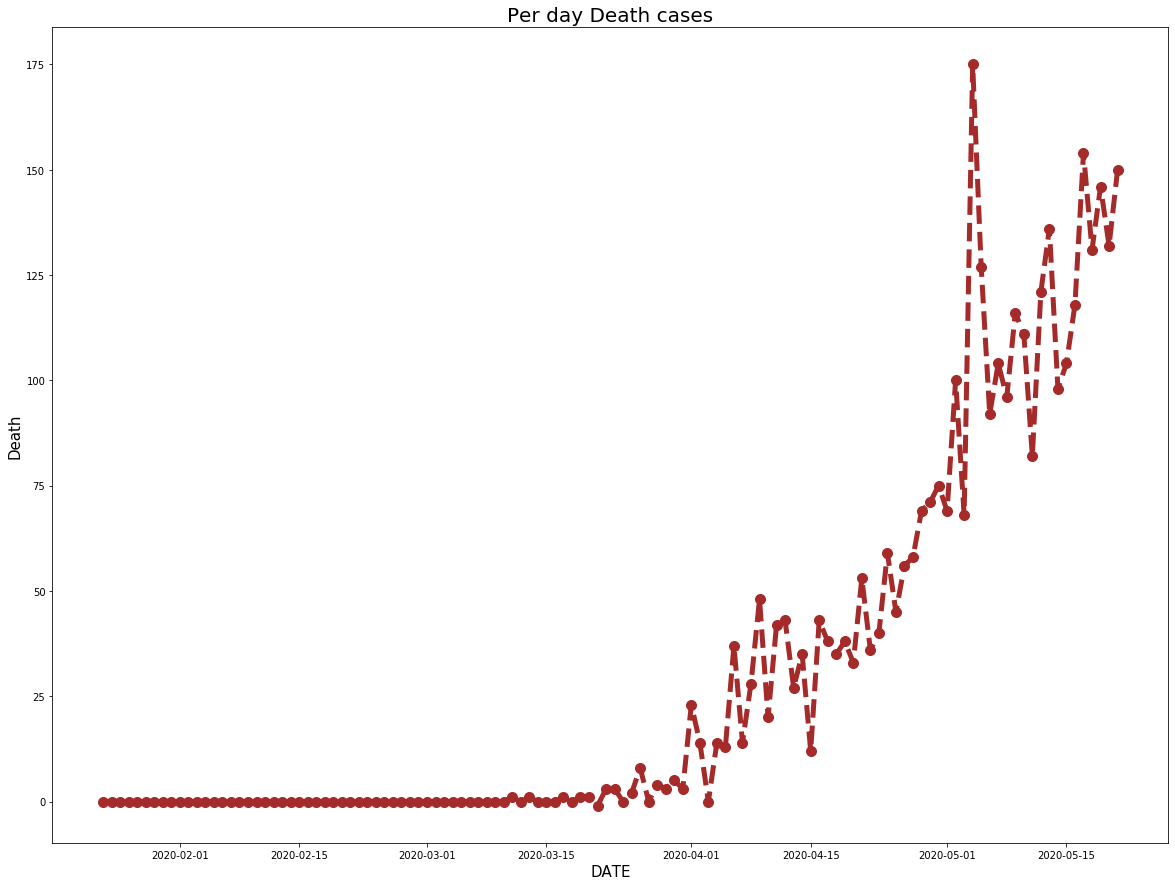

In [31]:
country = 'India'
plt.figure(figsize=(20,15))
t = df_death_con[country] - df_death_con[country].shift(1)
df_death_con['date']=pd.to_datetime(df_death_con['date'])
plt.plot(df_death_con['date'],t,marker='o',markersize=10,linestyle='dashed',color='brown',linewidth=5)
plt.title('Per day Death cases',fontsize=20)
plt.ylabel('Death',fontsize=15)
plt.xlabel('DATE',fontsize=15)

# Daily analysis

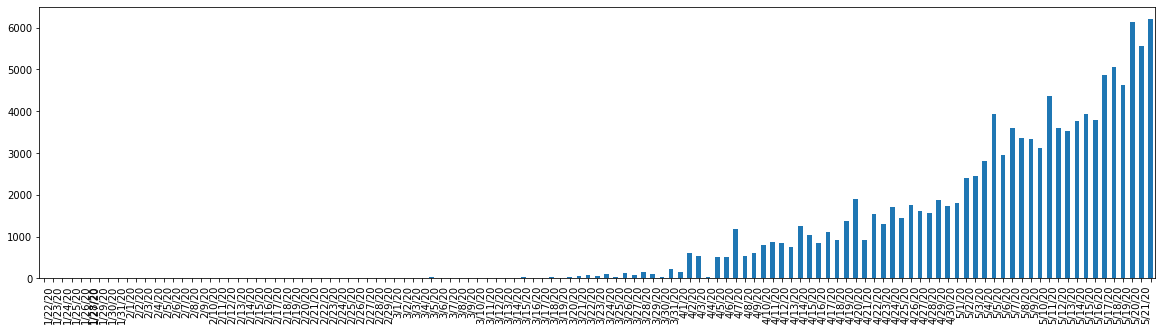

In [32]:
country = 'India'
t = df_confirmed_con[country] - df_confirmed_con[country].shift(1)
plt.figure(figsize=(20,5))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
t.plot(kind = 'bar')